In [2]:
filepath = 'capitalism-news-dataset.xlsx'
df = pd.read_excel(filepath)
print(df.shape)
df.head()

(99153, 6)


,class,label,text,keywords,url,class-validation
0,1,Протест,Переписать конституцию решили после массовых п...,переписать конституция решить массовый протест...,-,human
1,1,Протест,В Варшаве тысячи поляков вышли на акцию протес...,_локация _число _нац выйти акция протест проти...,https://life.ru/p/1798153,4x-BERT-ensemble
2,1,Протест,Протесты против правительства в Мадагаскаре пр...,протест против правительство _локация продолжа...,https://www.zeit.de/politik/ausland/2025-10/ma...,4x-BERT-ensemble
3,1,Протест,В главном городе Польши тысячи людей вышли на ...,главный город _локация _число человек выйти де...,https://www.zeit.de/politik/ausland/2025-10/po...,4x-BERT-ensemble
4,1,Протест,Молодые люди в Марроко уже несколько дней прот...,молодой человек _локация несколько день протес...,https://www.zeit.de/politik/ausland/2025-10/pr...,4x-BERT-ensemble


In [3]:
class2label = dict(zip(df['class'],df['label']))
class2label

{1: 'Протест',
 2: 'Борьба трудящихся',
 3: 'Трудовые отношения',
 4: 'Условия жизни',
 5: 'Упадок сфер',
 6: 'Закредитованность',
 7: 'Неравенство',
 8: 'Репрессии',
 9: 'Будни Атлантов',
 10: 'Экономические отношения',
 11: 'Боевые действия',
 12: 'Прочее',
 0: '-'}

In [4]:
df_pos = df[df['class']>0]
df_neg = df[df['class']==0]

len(df_pos), len(df_neg)

(19542, 79611)

In [5]:
k,v = np.unique(df_pos['label'], return_counts=True)
class2num = dict(zip(k.tolist(),v.tolist()))
class2num = dict(sorted(class2num.items(), key=lambda item: -item[1]))
class2num

{'Условия жизни': 4853,
 'Борьба трудящихся': 3787,
 'Трудовые отношения': 3191,
 'Упадок сфер': 1756,
 'Будни Атлантов': 1518,
 'Закредитованность': 998,
 'Протест': 966,
 'Прочее': 824,
 'Экономические отношения': 735,
 'Репрессии': 406,
 'Неравенство': 276,
 'Боевые действия': 232}

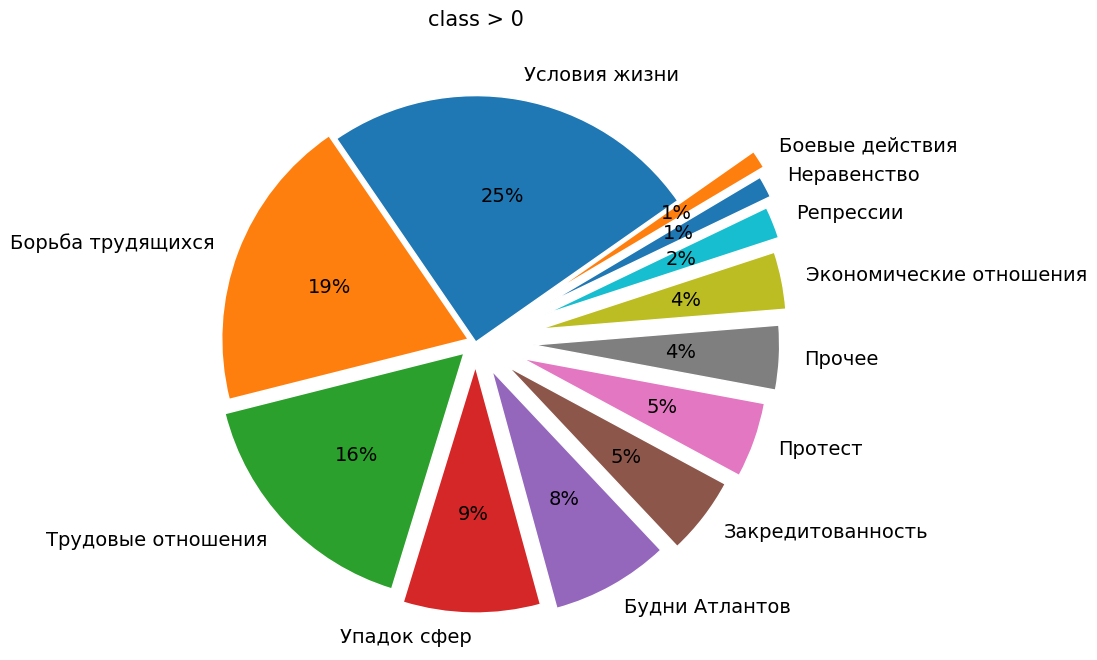

In [6]:
import matplotlib.pyplot as plt

labels = class2num.keys()
sizes = class2num.values()
explode = np.arange(len(labels))/30
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(
    sizes,
    labels=labels,
    autopct='%1.0f%%',
    startangle=35,
    explode=explode,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title("class > 0", fontsize=15)
plt.show()

In [7]:
# the most frequent keywords

from collections import Counter

for c in range(1,13,1):
    dfc = df[df['class']==c]
    kw = []
    for k in dfc['keywords'].values:
        kw.extend([x for x in k.split() if '_' not in x])
    Counters_found = Counter(kw)
    kwn = Counters_found.most_common(15)
    kw = ' '.join([x for (x,y) in kwn])
    print(c, class2label[c], ':', kw, '\n')

1 Протест : протест против выйти человек акция протестовать улица правительство массовый демонстрация пройти город страна митинг начаться 

2 Борьба трудящихся : забастовка работник профсоюз бастовать рабочий врач обратиться сотрудник зарплата объявить митинг день против водитель требовать 

3 Трудовые отношения : сотрудник рабочий зарплата сократить место работник увольнение сокращение уволить компания год работа человек сокращать планировать 

4 Условия жизни : год цена вырасти подорожать стоимость рост человек инфляция продукт бедность ребенок данные начало жилье услуга 

5 Упадок сфер : остаться авария год дефицит нехватка вода свет страна производство житель дом тыс рабочий человек сократиться 

6 Закредитованность : кредит год долг рубль вырасти банк ипотека гражданин ипотечный число объем выдать кредитный должник банкротство 

7 Неравенство : богатый неравенство год самый богатство человек бедный мир состояние доход доллар миллиардер страна рост население 

8 Репрессии : человек